Import necessary libraries

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

Load and inspect data

In [2]:
df=pd.read_csv("D:/datasets/employee_attrition_dataset.csv")
df

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,...,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Male,Single,Finance,Manager,5,7332,81,24,...,No,9,48,16,4,1,1,49,3,No
1,2,48,Female,Divorced,HR,Assistant,4,6069,55,18,...,Yes,9,57,10,4,1,1,25,1,No
2,3,34,Female,Married,Marketing,Manager,4,11485,65,6,...,Yes,3,55,1,1,4,3,21,1,Yes
3,4,27,Female,Divorced,HR,Manager,4,18707,28,12,...,No,9,53,2,3,4,1,46,2,No
4,5,40,Male,Married,HR,Analyst,1,16398,92,3,...,No,1,54,11,1,1,1,43,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,22,Female,Divorced,Marketing,Manager,5,4276,27,17,...,Yes,3,36,3,4,2,3,18,2,No
9996,9997,35,Female,Divorced,Marketing,Executive,3,10327,60,19,...,No,5,59,4,4,3,4,31,1,No
9997,9998,23,Male,Divorced,IT,Manager,3,12592,68,10,...,Yes,4,54,10,4,4,2,12,1,Yes
9998,9999,42,Female,Single,Marketing,Manager,3,9287,26,18,...,Yes,9,51,16,3,2,2,18,3,No


In [3]:
df.head(5)

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,...,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Male,Single,Finance,Manager,5,7332,81,24,...,No,9,48,16,4,1,1,49,3,No
1,2,48,Female,Divorced,HR,Assistant,4,6069,55,18,...,Yes,9,57,10,4,1,1,25,1,No
2,3,34,Female,Married,Marketing,Manager,4,11485,65,6,...,Yes,3,55,1,1,4,3,21,1,Yes
3,4,27,Female,Divorced,HR,Manager,4,18707,28,12,...,No,9,53,2,3,4,1,46,2,No
4,5,40,Male,Married,HR,Analyst,1,16398,92,3,...,No,1,54,11,1,1,1,43,4,No


In [4]:
df.tail(5)

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,...,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
9995,9996,22,Female,Divorced,Marketing,Manager,5,4276,27,17,...,Yes,3,36,3,4,2,3,18,2,No
9996,9997,35,Female,Divorced,Marketing,Executive,3,10327,60,19,...,No,5,59,4,4,3,4,31,1,No
9997,9998,23,Male,Divorced,IT,Manager,3,12592,68,10,...,Yes,4,54,10,4,4,2,12,1,Yes
9998,9999,42,Female,Single,Marketing,Manager,3,9287,26,18,...,Yes,9,51,16,3,2,2,18,3,No
9999,10000,39,Female,Divorced,Finance,Executive,2,7225,54,16,...,Yes,4,51,6,4,1,1,6,2,Yes


Preprocess data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    10000 non-null  int64 
 1   Age                            10000 non-null  int64 
 2   Gender                         10000 non-null  object
 3   Marital_Status                 10000 non-null  object
 4   Department                     10000 non-null  object
 5   Job_Role                       10000 non-null  object
 6   Job_Level                      10000 non-null  int64 
 7   Monthly_Income                 10000 non-null  int64 
 8   Hourly_Rate                    10000 non-null  int64 
 9   Years_at_Company               10000 non-null  int64 
 10  Years_in_Current_Role          10000 non-null  int64 
 11  Years_Since_Last_Promotion     10000 non-null  int64 
 12  Work_Life_Balance              10000 non-null  int64 
 13  Jo

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Employee_ID,10000.0,5000.5000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Age,10000.0,39.5618,11.454986,20.0,30.00,40.0,49.00,59.0
Job_Level,10000.0,2.9908,1.410643,1.0,2.00,3.0,4.00,5.0
Monthly_Income,10000.0,11436.7167,4926.528302,3000.0,7182.50,11401.5,15679.50,19999.0
Hourly_Rate,10000.0,57.0323,24.703261,15.0,36.00,57.0,78.00,99.0
Years_at_Company,10000.0,14.9362,8.431657,1.0,8.00,15.0,22.00,29.0
Years_in_Current_Role,10000.0,7.4513,4.042903,1.0,4.00,7.0,11.00,14.0
Years_Since_Last_Promotion,10000.0,4.4719,2.891617,0.0,2.00,4.0,7.00,9.0
Work_Life_Balance,10000.0,2.5024,1.112348,1.0,2.00,2.0,3.00,4.0
Job_Satisfaction,10000.0,3.0380,1.414764,1.0,2.00,3.0,4.00,5.0


In [6]:
df.isnull().T

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
Employee_ID,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Age,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Gender,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Marital_Status,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Department,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Job_Role,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Job_Level,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Monthly_Income,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Hourly_Rate,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Years_at_Company,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

Employee_ID                      0
Age                              0
Gender                           0
Marital_Status                   0
Department                       0
Job_Role                         0
Job_Level                        0
Monthly_Income                   0
Hourly_Rate                      0
Years_at_Company                 0
Years_in_Current_Role            0
Years_Since_Last_Promotion       0
Work_Life_Balance                0
Job_Satisfaction                 0
Performance_Rating               0
Training_Hours_Last_Year         0
Overtime                         0
Project_Count                    0
Average_Hours_Worked_Per_Week    0
Absenteeism                      0
Work_Environment_Satisfaction    0
Relationship_with_Manager        0
Job_Involvement                  0
Distance_From_Home               0
Number_of_Companies_Worked       0
Attrition                        0
dtype: int64

Drop columns with excessive missing values (if any)

In [8]:
df.dropna(inplace=True)

In [9]:
df.head(2)

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,...,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Male,Single,Finance,Manager,5,7332,81,24,...,No,9,48,16,4,1,1,49,3,No
1,2,48,Female,Divorced,HR,Assistant,4,6069,55,18,...,Yes,9,57,10,4,1,1,25,1,No


In [10]:
df.isnull().sum().sum()

0

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    10000 non-null  int64 
 1   Age                            10000 non-null  int64 
 2   Gender                         10000 non-null  object
 3   Marital_Status                 10000 non-null  object
 4   Department                     10000 non-null  object
 5   Job_Role                       10000 non-null  object
 6   Job_Level                      10000 non-null  int64 
 7   Monthly_Income                 10000 non-null  int64 
 8   Hourly_Rate                    10000 non-null  int64 
 9   Years_at_Company               10000 non-null  int64 
 10  Years_in_Current_Role          10000 non-null  int64 
 11  Years_Since_Last_Promotion     10000 non-null  int64 
 12  Work_Life_Balance              10000 non-null  int64 
 13  Jo

In [14]:
df.columns

Index(['Employee_ID', 'Age', 'Gender', 'Marital_Status', 'Department',
       'Job_Role', 'Job_Level', 'Monthly_Income', 'Hourly_Rate',
       'Years_at_Company', 'Years_in_Current_Role',
       'Years_Since_Last_Promotion', 'Work_Life_Balance', 'Job_Satisfaction',
       'Performance_Rating', 'Training_Hours_Last_Year', 'Overtime',
       'Project_Count', 'Average_Hours_Worked_Per_Week', 'Absenteeism',
       'Work_Environment_Satisfaction', 'Relationship_with_Manager',
       'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked',
       'Attrition'],
      dtype='object')

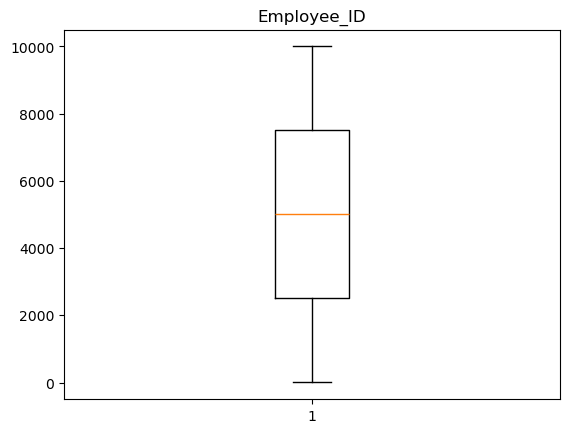

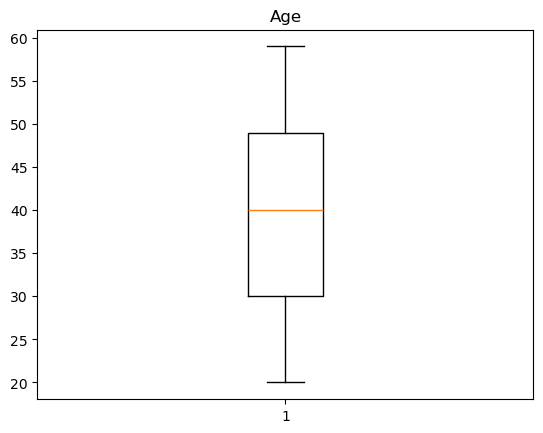

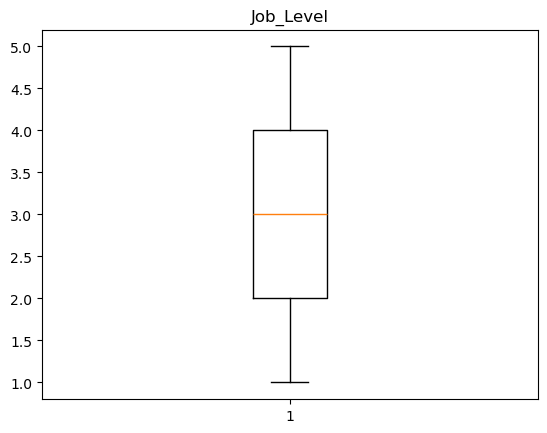

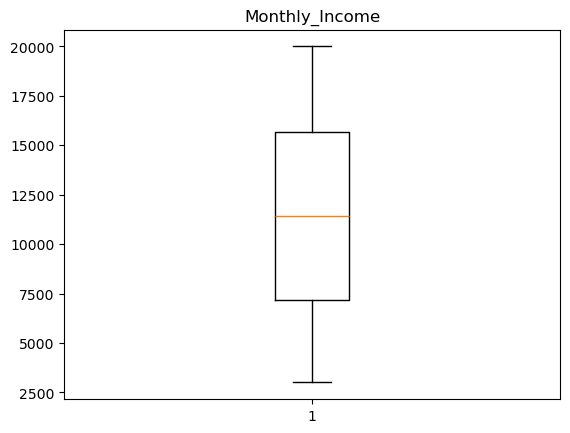

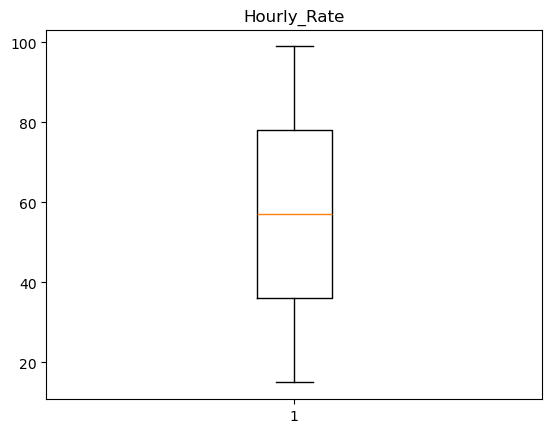

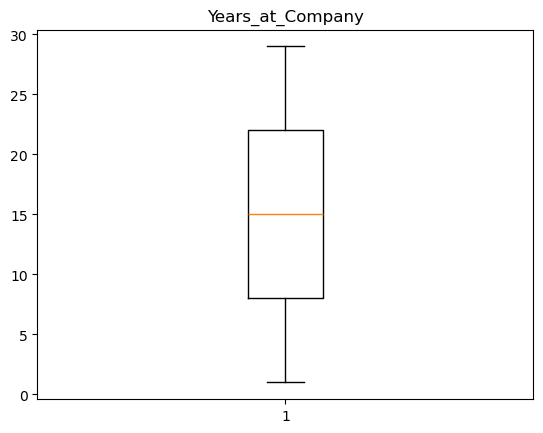

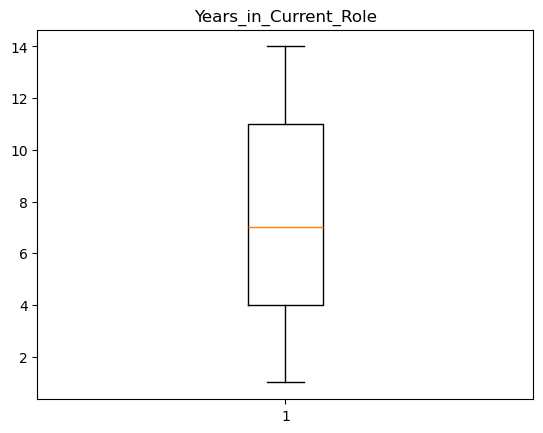

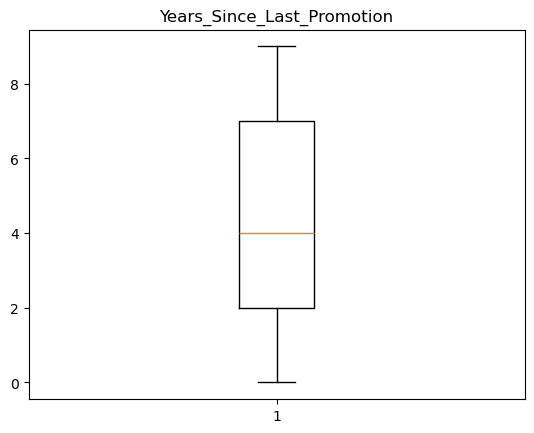

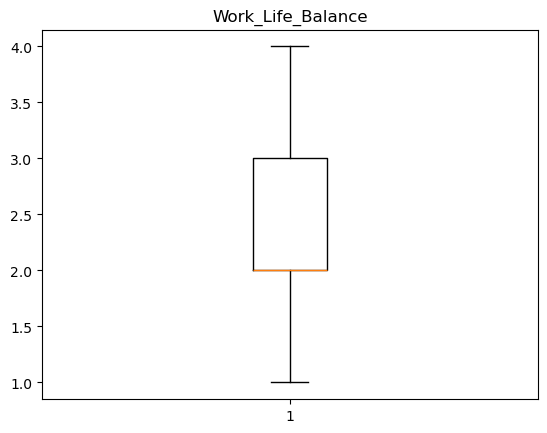

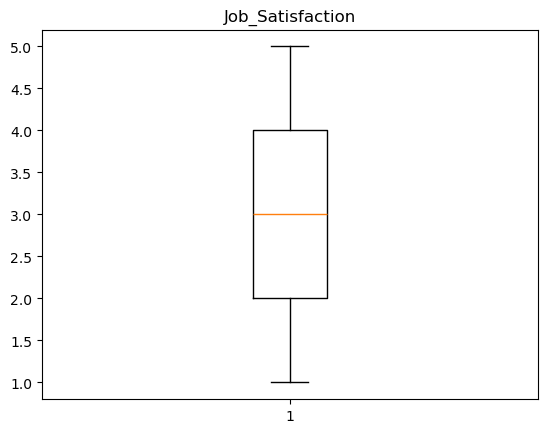

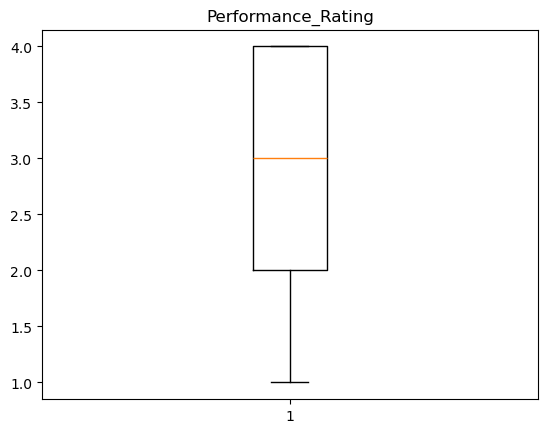

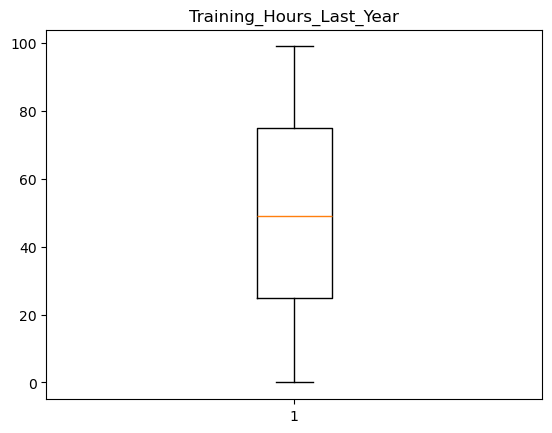

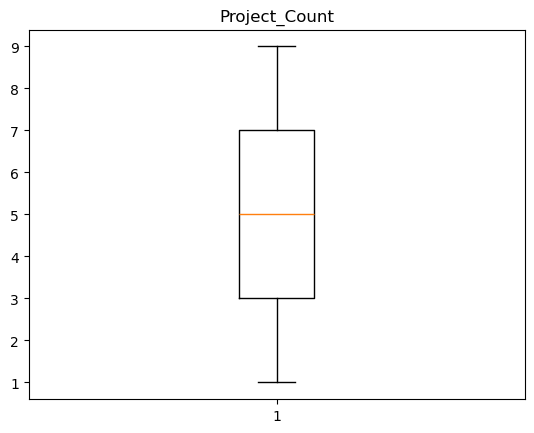

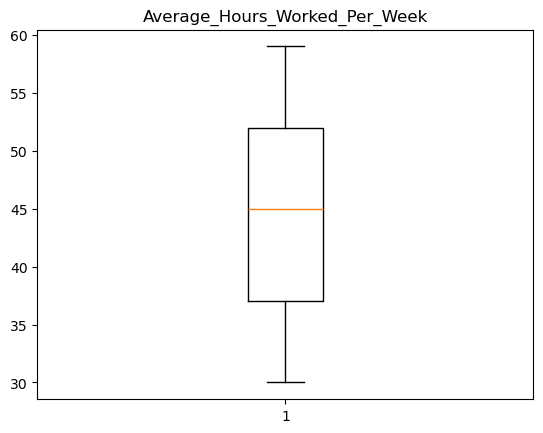

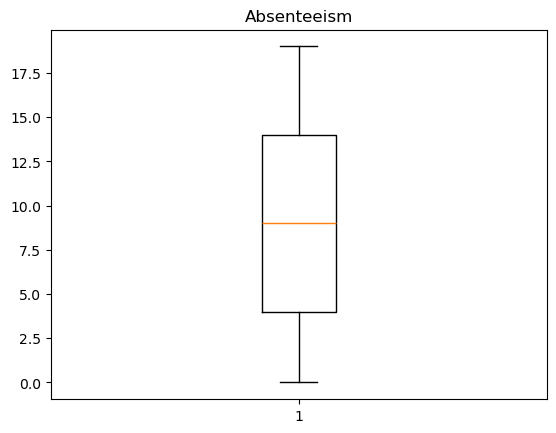

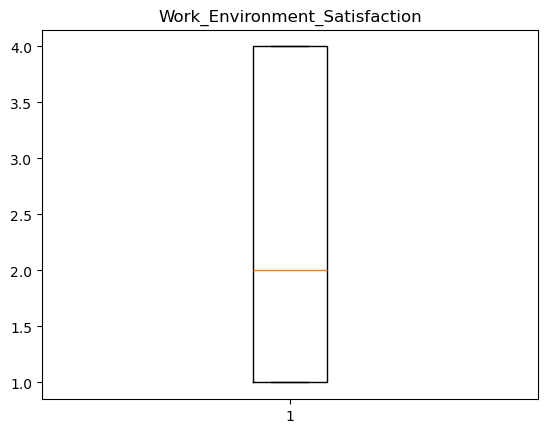

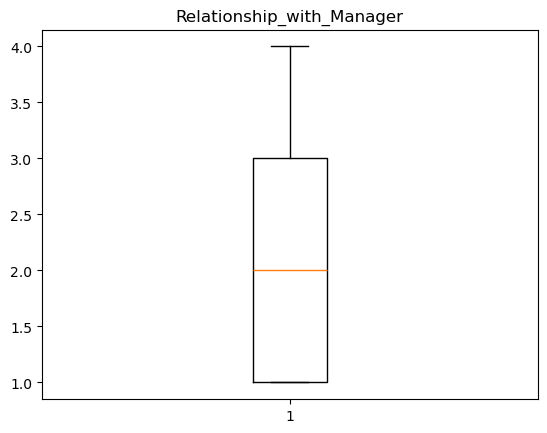

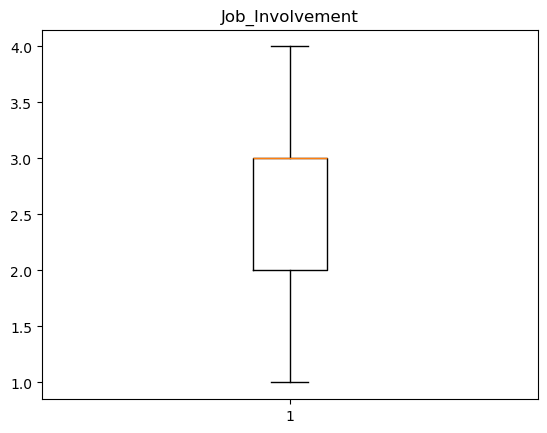

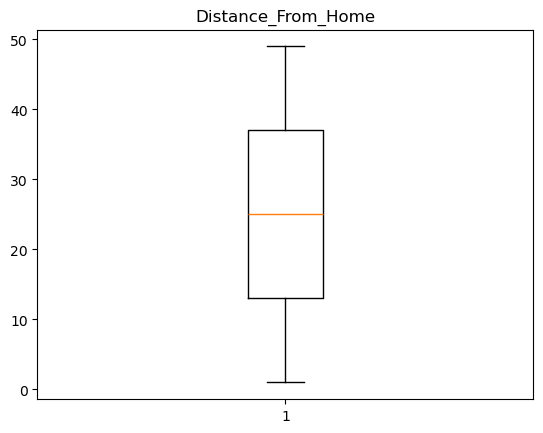

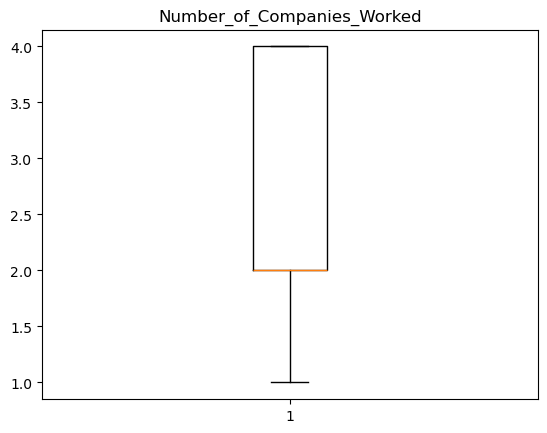

In [15]:
for i in df.columns:
    if(df[i].dtypes!=object):
        plt.boxplot(df[i])
        plt.title(i)
        plt.show()

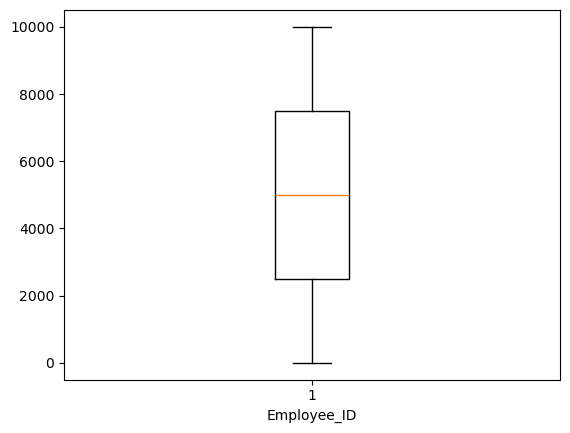

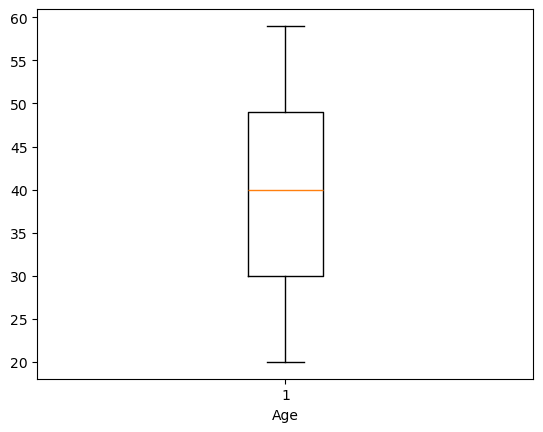

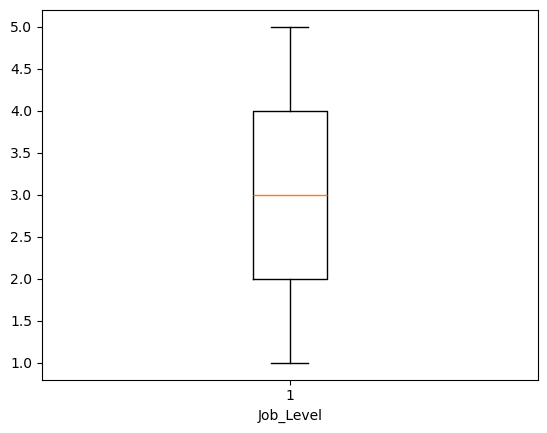

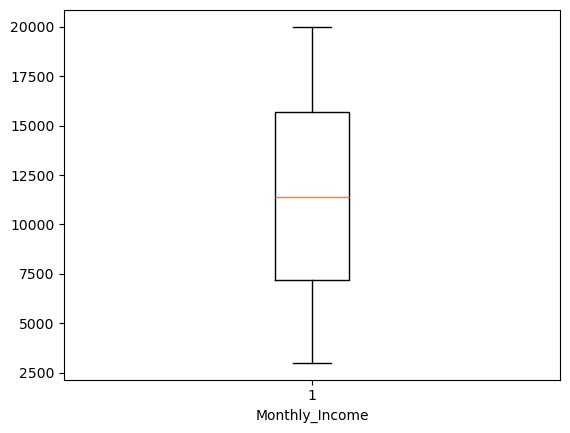

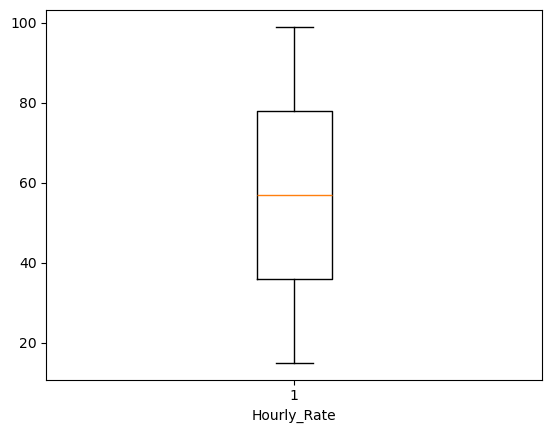

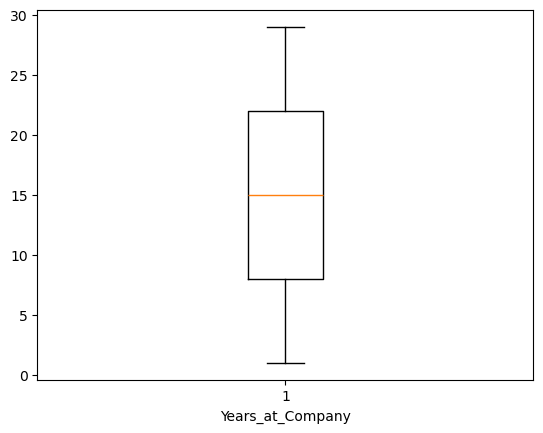

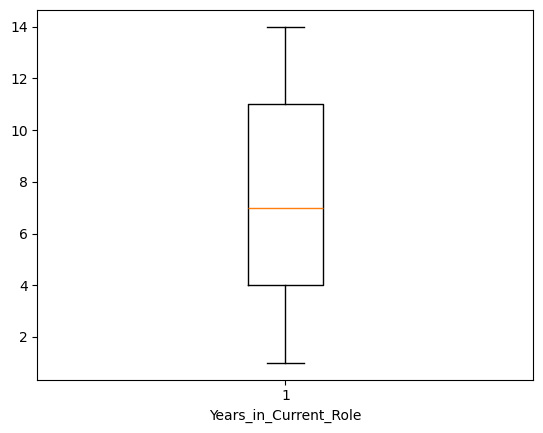

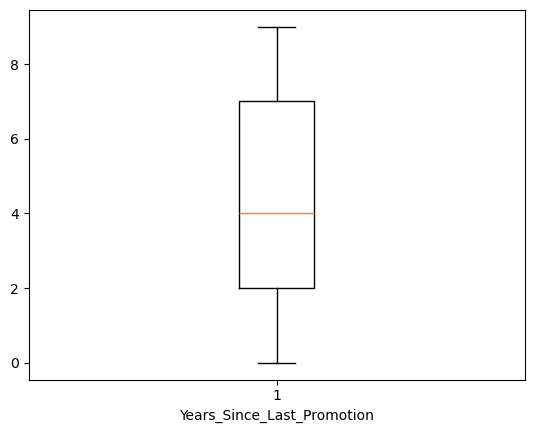

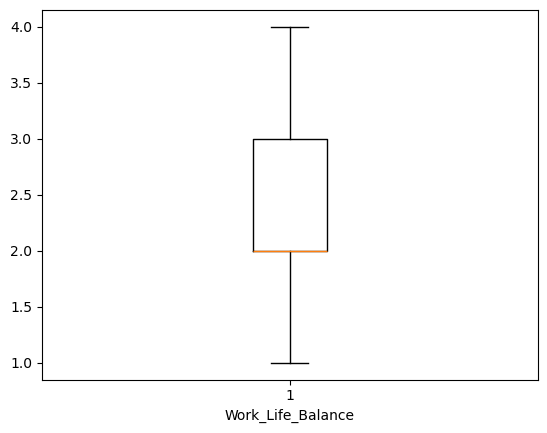

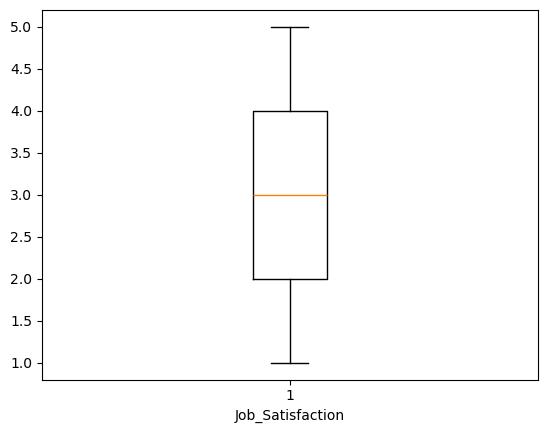

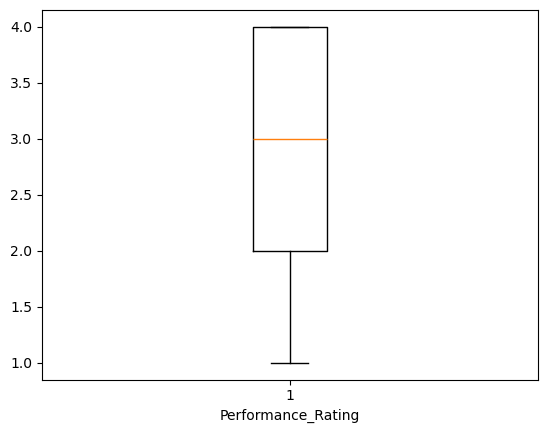

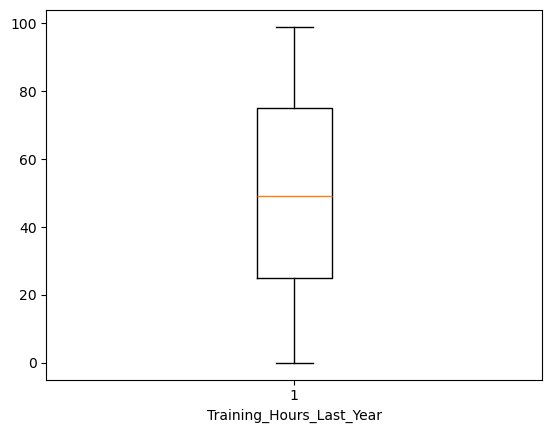

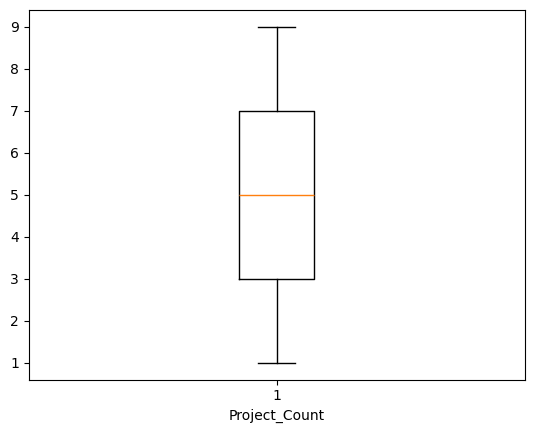

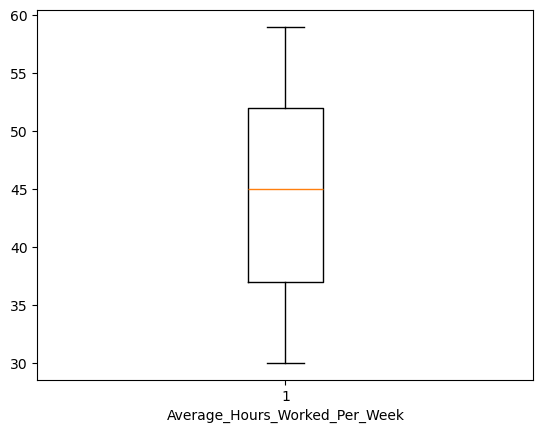

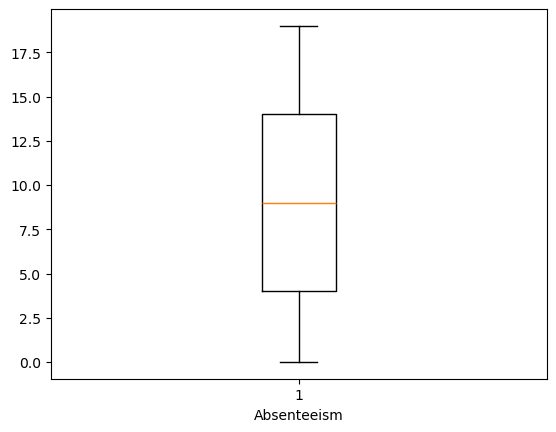

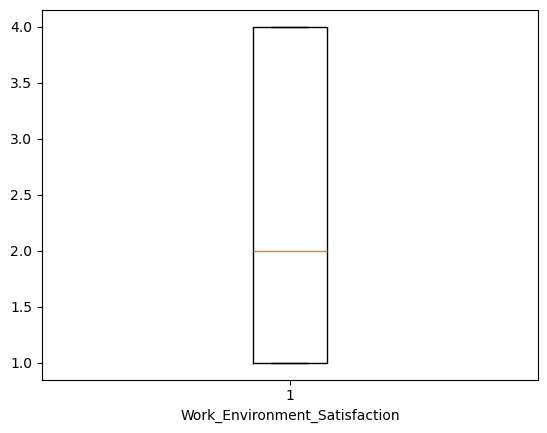

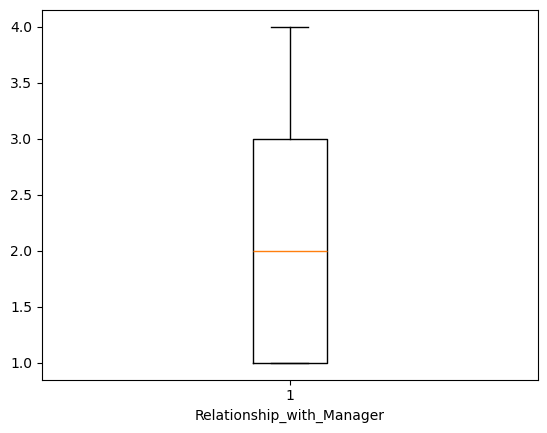

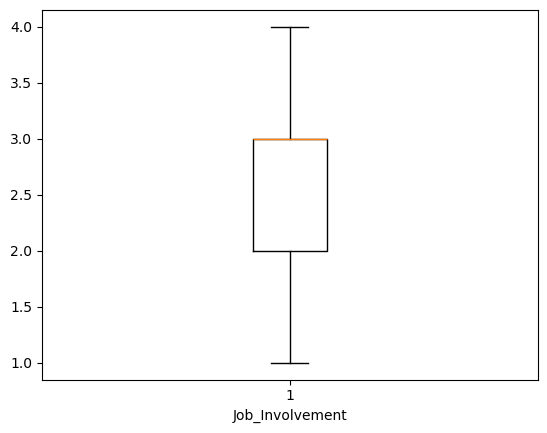

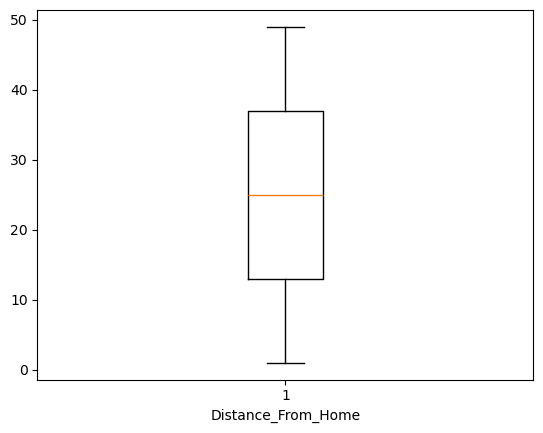

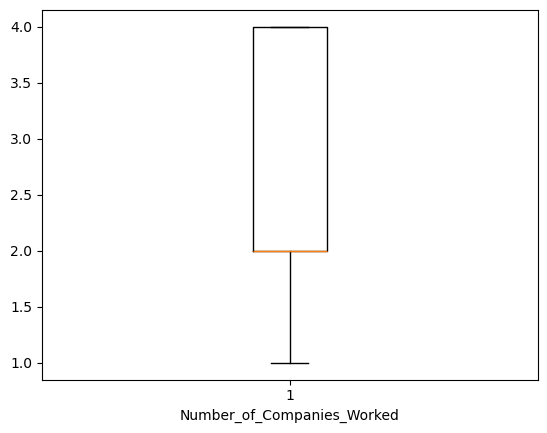

In [17]:
for i in df.columns:
    if((df[i].dtypes!="object")&(df[i].dtypes=="int64")):
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.show()

In [18]:
df["Attrition"].value_counts()

Attrition
No     8003
Yes    1997
Name: count, dtype: int64

In [19]:
df["Gender"].value_counts()

Gender
Female    5042
Male      4958
Name: count, dtype: int64

In [20]:
df["Department"].value_counts()

Department
Marketing    2133
Sales        2008
Finance      1990
HR           1953
IT           1916
Name: count, dtype: int64

In [21]:
df["Job_Role"].value_counts()

Job_Role
Analyst      2572
Assistant    2538
Executive    2476
Manager      2414
Name: count, dtype: int64

In [26]:
df[df["Job_Role"]==1].shape

(0, 26)

In [43]:
df.shape

(10000, 26)

Fill remaining missing values

In [53]:
col=df.columns
for i in df.select_dtypes(include=["object"]).columns:
    df[col]=df[col].fillna(df[col].mode())

In [54]:
df.head(5)

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,...,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Male,Single,Finance,Manager,5,7332,81,24,...,No,9,48,16,4,1,1,49,3,No
1,2,48,Female,Divorced,HR,Assistant,4,6069,55,18,...,Yes,9,57,10,4,1,1,25,1,No
2,3,34,Female,Married,Marketing,Manager,4,11485,65,6,...,Yes,3,55,1,1,4,3,21,1,Yes
3,4,27,Female,Divorced,HR,Manager,4,18707,28,12,...,No,9,53,2,3,4,1,46,2,No
4,5,40,Male,Married,HR,Analyst,1,16398,92,3,...,No,1,54,11,1,1,1,43,4,No


convert into variables

In [56]:
le=LabelEncoder()

In [62]:
col_list=df.columns
col_list=df.select_dtypes(include="object")
for i in df.columns:
    df[i]=le.fit_transform(df[i])

In [64]:
df.head(5)

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,...,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,0,38,1,2,0,3,4,1973,66,23,...,0,8,18,16,3,0,0,48,2,0
1,1,28,0,0,1,1,3,1405,40,17,...,1,8,27,10,3,0,0,24,0,0
2,2,14,0,1,3,3,3,3841,50,5,...,1,2,25,1,0,3,2,20,0,1
3,3,7,0,0,1,3,3,7017,13,11,...,0,8,23,2,2,3,0,45,1,0
4,4,20,1,1,1,0,0,6007,77,2,...,0,0,24,11,0,0,0,42,3,0


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Employee_ID                    10000 non-null  int64   
 1   Age                            10000 non-null  int64   
 2   Gender                         10000 non-null  int64   
 3   Marital_Status                 10000 non-null  int64   
 4   Department                     10000 non-null  int64   
 5   Job_Role                       10000 non-null  int64   
 6   Job_Level                      10000 non-null  int64   
 7   Monthly_Income                 10000 non-null  int64   
 8   Hourly_Rate                    10000 non-null  int64   
 9   Years_at_Company               10000 non-null  int64   
 10  Years_in_Current_Role          10000 non-null  int64   
 11  Years_Since_Last_Promotion     10000 non-null  int64   
 12  Work_Life_Balance              10

In [67]:
if 'JobSatisfaction' in df.columns and 'MonthlyIncome' in df.columns:
    df['IncomePerSatisfaction'] = df['MonthlyIncome'] / (df['JobSatisfaction'] + 1)

In [69]:
df['YearsAtCompanyLevel'] = pd.cut(df['Years_at_Company'], bins=[0,2,5,10,40], labels=[0,1,2,3])

In [70]:
df['YearsAtCompanyLevel']

0       3
1       3
2       1
3       3
4       0
       ..
9995    3
9996    3
9997    2
9998    3
9999    3
Name: YearsAtCompanyLevel, Length: 10000, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [73]:
target="Attrition"
x=df.drop(target,axis=1)
y=df[target]

In [75]:
df.head(5)

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,...,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition,YearsAtCompanyLevel
0,0,38,1,2,0,3,4,1973,66,23,...,8,18,16,3,0,0,48,2,0,3
1,1,28,0,0,1,1,3,1405,40,17,...,8,27,10,3,0,0,24,0,0,3
2,2,14,0,1,3,3,3,3841,50,5,...,2,25,1,0,3,2,20,0,1,1
3,3,7,0,0,1,3,3,7017,13,11,...,8,23,2,2,3,0,45,1,0,3
4,4,20,1,1,1,0,0,6007,77,2,...,0,24,11,0,0,0,42,3,0,0


In [76]:
x

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,...,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,YearsAtCompanyLevel
0,0,38,1,2,0,3,4,1973,66,23,...,0,8,18,16,3,0,0,48,2,3
1,1,28,0,0,1,1,3,1405,40,17,...,1,8,27,10,3,0,0,24,0,3
2,2,14,0,1,3,3,3,3841,50,5,...,1,2,25,1,0,3,2,20,0,1
3,3,7,0,0,1,3,3,7017,13,11,...,0,8,23,2,2,3,0,45,1,3
4,4,20,1,1,1,0,0,6007,77,2,...,0,0,24,11,0,0,0,42,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,2,0,0,3,3,4,580,12,16,...,1,2,6,3,3,1,2,17,1,3
9996,9996,15,0,0,3,2,2,3318,45,18,...,0,4,29,4,3,2,3,30,0,3
9997,9997,3,1,0,2,3,2,4310,53,9,...,1,3,24,10,3,3,1,11,0,2
9998,9998,22,0,2,3,3,2,2876,11,17,...,1,8,21,16,2,1,1,17,2,3


In [77]:
y

0       0
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: Attrition, Length: 10000, dtype: int64

Train-test split

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [80]:
x_train

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,...,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,YearsAtCompanyLevel
9254,9254,23,0,0,4,3,3,6835,16,9,...,0,0,0,16,0,2,1,47,2,2
1561,1561,13,0,0,3,3,1,3606,58,2,...,1,6,11,8,0,0,0,48,2,0
1670,1670,32,1,1,0,2,4,6223,28,0,...,1,0,4,11,1,2,0,3,0,NaN
6087,6087,19,0,1,0,3,0,3767,17,4,...,1,2,10,8,0,0,0,34,2,1
6669,6669,14,1,0,0,0,2,5769,47,25,...,1,7,16,19,2,0,1,14,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,5734,5,0,1,0,1,4,5102,12,17,...,0,6,6,1,3,0,1,40,2,3
5191,5191,15,1,1,3,0,3,6026,31,25,...,1,8,7,7,2,0,1,8,1,3
5390,5390,3,1,0,4,3,2,664,13,23,...,1,2,15,5,0,1,1,43,1,3
860,860,9,1,1,4,3,0,6544,34,13,...,0,3,29,1,1,0,0,26,2,3


In [81]:
x_test.head(5)

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,...,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,YearsAtCompanyLevel
6252,6252,11,1,0,3,1,2,4652,74,8,...,1,8,2,18,3,2,0,33,3,2
4684,4684,5,1,0,1,0,2,3649,51,11,...,0,1,28,18,0,3,0,22,0,3
1731,1731,30,0,0,2,1,4,6960,41,23,...,1,1,12,4,3,3,3,38,2,3
4742,4742,16,1,0,4,2,3,4540,50,16,...,1,0,11,3,3,3,3,38,3,3
4521,4521,23,0,1,0,0,4,4982,29,15,...,0,6,18,5,1,0,0,0,3,3


In [82]:
y_train.head(5)

9254    1
1561    0
1670    0
6087    0
6669    1
Name: Attrition, dtype: int64

In [83]:
y_test.head(5)

6252    0
4684    1
1731    1
4742    1
4521    1
Name: Attrition, dtype: int64

 Model training

In [101]:
model=RandomForestClassifier(n_estimators=50,random_state=23)

In [102]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=23)

In [103]:
y1=model.predict(x_test)

In [104]:
y1

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [113]:
from sklearn.metrics import*

In [115]:
accuracy_score(y1,y_test)

0.399

In [116]:
confusion_matrix(y1,y_test)

array([[ 535,  145],
       [1057,  263]], dtype=int64)

Feature Scaling

In [91]:
scaler=StandardScaler()

In [92]:
x_train=scaler.fit_transform(x_train)

In [93]:
x_train

array([[ 1.4692775 ,  0.3004911 , -0.98412598, ...,  1.5934834 ,
         0.4375841 ,  0.18796451],
       [-1.19499359, -0.57388741, -0.98412598, ...,  1.66357361,
         0.4375841 ,  0.18796451],
       [-1.15724427,  1.08743176,  1.01613007, ..., -1.49048584,
        -1.35441631, -5.32015313],
       ...,
       [ 0.13108128, -1.44826592,  1.01613007, ...,  1.31312256,
        -0.45841611,  0.18796451],
       [-1.43776677, -0.92363881,  1.01613007, ...,  0.12158899,
         0.4375841 ,  0.18796451],
       [ 0.78217054, -0.13669815, -0.98412598, ..., -0.22886206,
         1.33358431,  0.18796451]])

In [117]:
x_test=scaler.transform(x_test)

In [119]:
x_test

array([[ 0.42961263, -0.74876311,  1.01613007, ...,  0.61222046,
         1.33358431,  0.18796451],
       [-0.11342351, -1.27339021,  1.01613007, ..., -0.15877185,
        -1.35441631,  0.18796451],
       [-1.1361185 ,  0.91255606, -0.98412598, ...,  0.96267151,
         0.4375841 ,  0.18796451],
       ...,
       [ 0.98407747, -1.09851451,  1.01613007, ..., -0.85967395,
         0.4375841 ,  0.18796451],
       [-1.35638061, -1.53570377, -0.98412598, ...,  1.5934834 ,
        -0.45841611,  0.18796451],
       [ 0.66407403,  1.26230747, -0.98412598, ...,  0.26176941,
         1.33358431,  0.18796451]])

Model evaluation

In [124]:
acc=accuracy_score(y_test,y1)
print(f"Classification Accuracy:{acc:2%}")
print(classification_report(y_test,y1))

Classification Accuracy:39.900000%
              precision    recall  f1-score   support

           0       0.79      0.34      0.47      1592
           1       0.20      0.64      0.30       408

    accuracy                           0.40      2000
   macro avg       0.49      0.49      0.39      2000
weighted avg       0.67      0.40      0.44      2000



In [125]:
acc

0.399

Feature importance — Identify top factors

In [129]:
feat_importances=pd.Series(model.feature_importances_, 
                           index=df.drop(target, axis=1).columns
                          )

In [130]:
feat_importances

Employee_ID                      0.075800
Age                              0.062960
Gender                           0.011211
Marital_Status                   0.018614
Department                       0.028279
Job_Role                         0.025011
Job_Level                        0.029117
Monthly_Income                   0.075419
Hourly_Rate                      0.068860
Years_at_Company                 0.054494
Years_in_Current_Role            0.047740
Years_Since_Last_Promotion       0.040474
Work_Life_Balance                0.023570
Job_Satisfaction                 0.027104
Performance_Rating               0.024141
Training_Hours_Last_Year         0.066529
Overtime                         0.011220
Project_Count                    0.039943
Average_Hours_Worked_Per_Week    0.055905
Absenteeism                      0.050902
Work_Environment_Satisfaction    0.024325
Relationship_with_Manager        0.023474
Job_Involvement                  0.025534
Distance_From_Home               0

In [137]:
top3=feat_importances.sort_values(ascending=False).head(3)
print("Top 3 Factors Contributing to Attrition:")
print(top3)

Top 3 Factors Contributing to Attrition:
Employee_ID       0.075800
Monthly_Income    0.075419
Hourly_Rate       0.068860
dtype: float64


In [138]:
top3

Employee_ID       0.075800
Monthly_Income    0.075419
Hourly_Rate       0.068860
dtype: float64

In [140]:
for factor in top3.index:
    if factor in ['JobSatisfaction', 'IncomePerSatisfaction']:
        print(f"\nRecommendation: Enhance {factor} through surveys, salary reviews, recognition programs, and career growth opportunities.")
    elif factor == 'Years_at_Company':
        print("\nRecommendation: Implement initiatives supporting long-term employee engagement and development.")

In [142]:
print(factor)

Hourly_Rate


In [144]:
df["Hourly_Rate"].value_counts()

Hourly_Rate
80    144
1     143
56    139
82    138
43    135
     ... 
65    100
67     99
39     99
66     99
40     97
Name: count, Length: 85, dtype: int64

In [150]:
df["Hourly_Rate"].sort_values(ascending=True).tail(5)

8465    84
2069    84
3094    84
4258    84
2046    84
Name: Hourly_Rate, dtype: int64

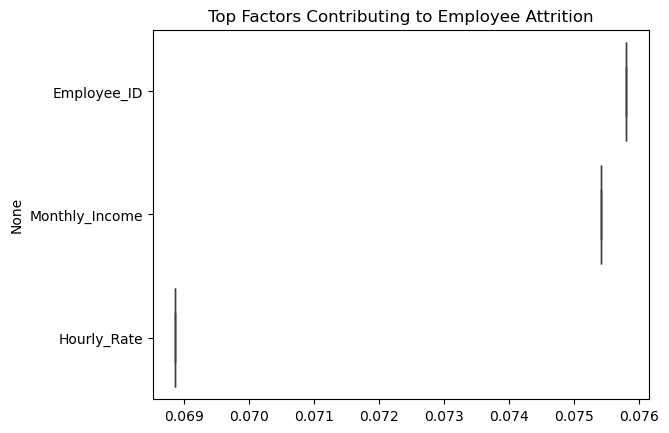

In [153]:
sns.boxplot(x=top3.values,y=top3.index)
plt.title("Top Factors Contributing to Employee Attrition")
plt.show()